## Retrieving Volcano Locations
___

We have access to a datafile with 65 different volcano locations and approximate aperture sizes. We will use this to extract location specific data fromt the [MODVOLC](http://modis.higp.hawaii.edu/cgi-bin/modisnew.cgi) database.

In [1]:
import pandas as pd

In [2]:
df_loc = pd.read_csv("data/volcanoes.txt", delimiter='\s', header=None, engine='python');

df_loc.columns = ["name", "long", "lat", "aperture"]

df_loc.head()

,name,long,lat,aperture
0,ambrym,168.12,-16.25,0.2
1,anatahan,145.67,16.35,0.2
2,aoba,167.83,-15.40,0.2
3,arenal,-84.71,10.46,0.2
4,asama,138.53,36.40,0.2


In [3]:
## Here I am selecting Kilauea as a target
target = df_loc[df_loc.name == 'kilauea'].values.flatten()

## Retrieving the Data for the Target
___

We have selected Kilauea as a temporary test target. Now, we will draw a box around the region and extract the data from MODVOLC.

In [4]:
from get_data import get_data

In [5]:
jyear = 2019
jday = 50
jperiod = 400
lonmin = (target[1] - target[3])
lonmax = (target[1] + target[3])
latmin = (target[2] - target[3])
latmax = (target[2] + target[3])

df = get_data(jyear=jyear, jday=jday, jperiod=jperiod, lonmin=lonmin, lonmax=lonmax, latmin=latmin, latmax=latmax)
df.rename(index=str, columns={"Mo": "Month", "Dy": "Day", "Hr": "Hour", "Mn" : "Minute"}, inplace=True)

df["datetime"] = pd.to_datetime(df[["Year", "Month", "Day", "Hour", "Minute"]])
print(f"...{df.shape[0]} measurements retrieved...")

df.head()

...8469 measurements retrieved...


,UNIX_Time,Sat,Year,Month,Day,Hour,Minute,Longitude,Latitude,B21,...,SunZen,SunAzi,Line,Samp,Ratio,Glint,Excess,Temp,Err,datetime
0,1536926699,A,2018,9,14,12,5,-154.823975,19.485868,0.927,...,144.44,52.92,284,655,-0.79,146.004,14.231,290.8,3.3,2018-09-14 12:05:00
1,1536222599,T,2018,9,6,8,30,-154.825378,19.484093,0.981,...,143.24,-48.60,739,840,-0.80,132.169,13.426,291.3,2.4,2018-09-06 08:30:00
2,1536050399,T,2018,9,4,8,40,-154.819183,19.486885,0.912,...,144.67,-44.91,1650,527,-0.80,150.700,12.226,291.6,2.6,2018-09-04 08:40:00
3,1536050399,T,2018,9,4,8,40,-154.830811,19.468281,1.041,...,144.67,-44.94,1648,529,-0.79,149.973,14.144,291.4,1.9,2018-09-04 08:40:00
4,1534840199,T,2018,8,21,8,30,-154.824631,19.475510,1.025,...,138.31,-43.74,764,839,-0.79,128.608,14.471,292.1,2.4,2018-08-21 08:30:00


## Plotting Spatial and Temporal Data

In [6]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

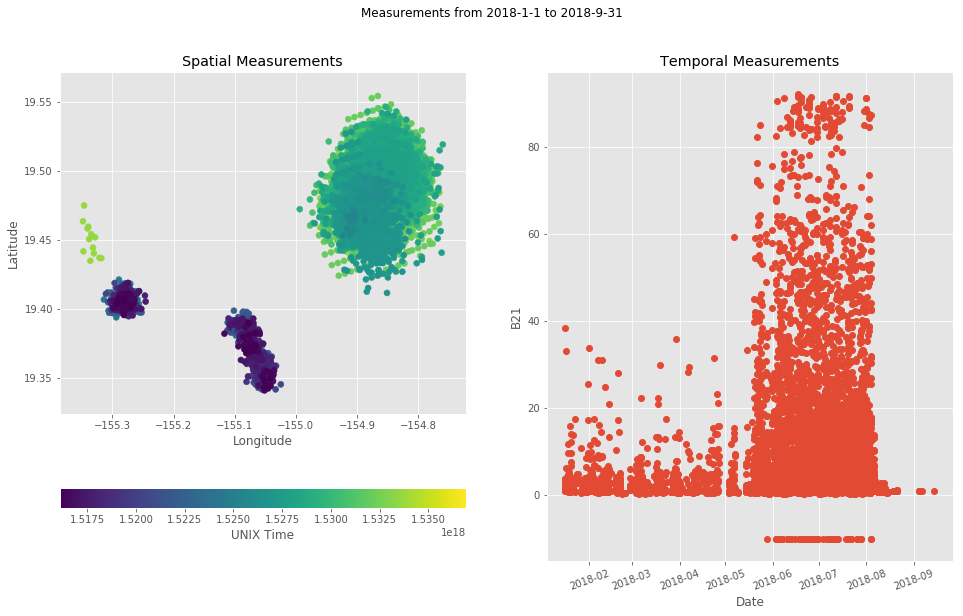

In [7]:
fig, ax = plt.subplots(1, 2, figsize=(16,9))

scatter = ax[0].scatter(df.Longitude, df.Latitude, c=df.datetime)#, cmap=plt.cm.autumn)
cbar = fig.colorbar(scatter, ax=ax[0], orientation='horizontal')
cbar.set_label('UNIX Time')

#ax[0].add_artist(plt.Circle(target[1:3], target[3]/2., color='k', fill=False))
ax[0].set_title("Spatial Measurements")
ax[0].set_xlabel("Longitude")
ax[0].set_ylabel("Latitude")

scatter = ax[1].plot_date(df.datetime, df.B21)

ax[1].set_title("Temporal Measurements")
ax[1].set_xlabel("Date")
plt.xticks(rotation=20)
ax[1].set_ylabel("B21")

fig.suptitle(f"Measurements from {df.Year.min()}-{df.Month.min()}-{df.Day.min()} to {df.Year.max()}-{df.Month.max()}-{df.Day.max()}")
plt.show()